In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

In [2]:
# Load data
file_path = '/home/data3/Ali/Code/Moghis/Train-data-preprocessed-2.xlsx'
data = pd.read_excel(file_path)


In [3]:
# Define features and target
features = [
    'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03',
    'migration_03', 'glob_hlth_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03',
    'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 'iadl_shop_03',
    'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03',
    'enjoy_03', 'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03',
    'hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03',
    'cancer_03', 'n_illnesses_03', 'exer_3xwk_03', 'alcohol_03', 'tobacco_03', 'test_chol_03',
    'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03',
    'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03',
    'insured_03', 'decis_personal_03', 'employment_03', 'age_12', 'urban_12', 'married_12',
    'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 'adl_dress_12',
    'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12',
    'iadl_money_12', 'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12',
    'hard_12', 'restless_12', 'happy_12', 'lonely_12', 'enjoy_12', 'sad_12', 'tired_12',
    'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 'diabetes_12',
    'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12',
    'bmi_12', 'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12',
    'test_diab_12', 'test_pres_12', 'hosp_12', 'visit_med_12', 'out_proc_12', 'visit_dental_12',
    'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'insured_12',
    'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 'vax_pneu_12', 'seg_pop_12',
    'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12',
    'reads_12', 'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12',
    'sewing_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12',
    'wouldnt_change_12', 'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03',
    'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03',
    'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12',
    'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12',
    'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
    'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'year', 'hincome_change',
    'niadl_change', 'adl_change', 'depr_change', 'glob_hlth_change', 'edu_gru_change',
    'illnesses_change'
    ]
target = 'composite_score'

# Drop rows with missing values for simplicity (optional)
data = data.dropna(subset=features + [target])

######################## Process Train Data ####################
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data[features] = data[features].fillna(data[features].mean())
data = data.dropna(subset=[target])


# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

## t-SNE

/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


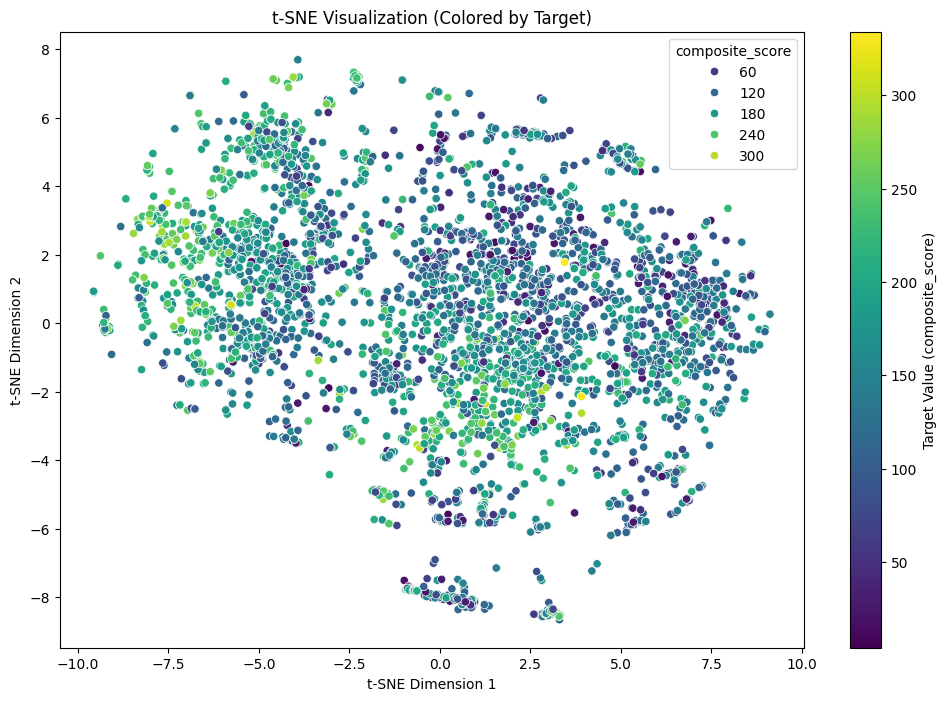

In [4]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(scaled_features)

# Add t-SNE results to the DataFrame
data['TSNE_1'] = tsne_results[:, 0]
data['TSNE_2'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue=target,
    palette='viridis',
    data=data,
    legend='brief'
)

# Adjust the color bar
norm = plt.Normalize(data[target].min(), data[target].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Link the color bar to the current axis
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Target Value (composite_score)')

plt.title('t-SNE Visualization (Colored by Target)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


## PCA

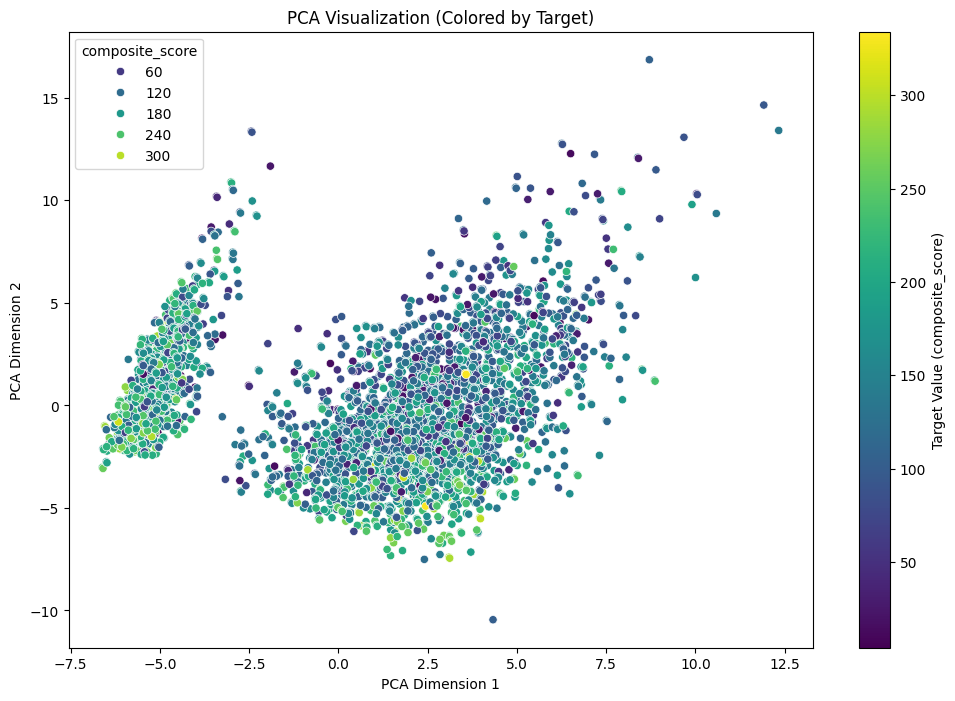

Explained Variance Ratio: [0.09127867 0.05224096]


In [5]:
# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
data['PCA_1'] = pca_results[:, 0]
data['PCA_2'] = pca_results[:, 1]

# Plotting
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='PCA_1', y='PCA_2',
    hue=target,
    palette='viridis',
    data=data,
    legend='brief'
)

# Set color bar through Seaborn
norm = plt.Normalize(data[target].min(), data[target].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Target Value (composite_score)')

plt.title('PCA Visualization (Colored by Target)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

## ICA

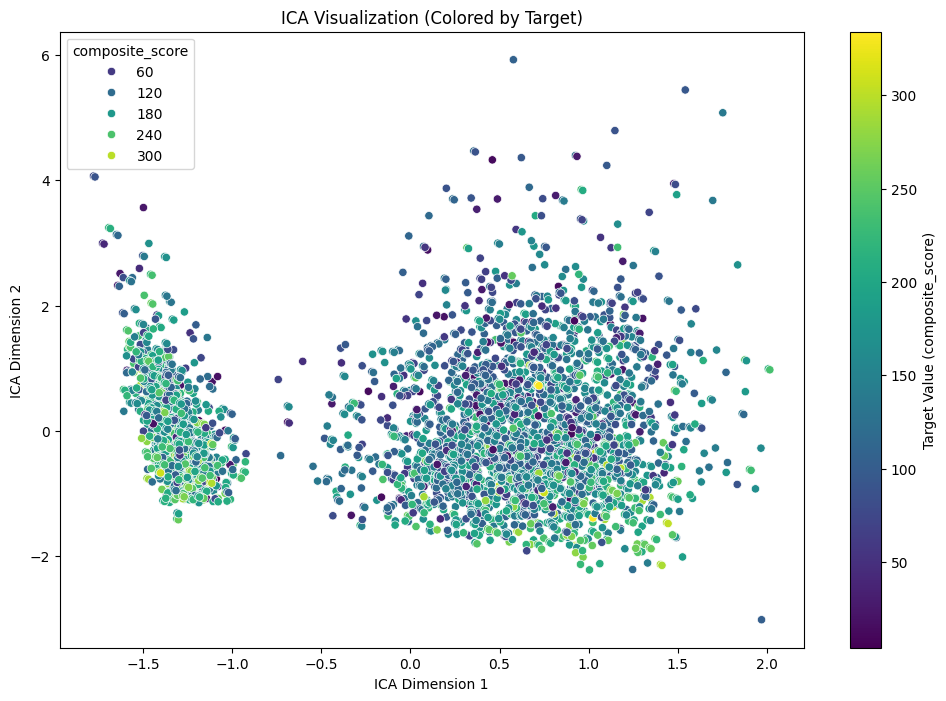

Independent Components:
 [[ 8.52300771e-01  2.63365911e-02]
 [ 8.71390614e-01 -2.14088629e-02]
 [ 6.81776899e-01  6.22987752e-02]
 [ 7.69711557e-01  1.14379648e-03]
 [ 6.27344045e-01 -2.36429822e-01]
 [ 8.08514278e-01  6.98314944e-02]
 [ 1.83789167e-01 -1.04007450e-01]
 [ 6.45238056e-01 -2.36310635e-01]
 [ 1.74508826e-01  2.24545833e-01]
 [ 9.58658784e-02  1.62999279e-01]
 [ 8.12952625e-02  1.59169871e-01]
 [ 6.45818198e-02  1.58206113e-01]
 [ 1.26828020e-01  2.22809748e-01]
 [ 1.07123653e-01  1.72415655e-01]
 [ 1.41939495e-01  2.53825332e-01]
 [ 4.85828869e-02  1.04455746e-01]
 [ 6.53775310e-02  1.01049362e-01]
 [ 1.39888425e-01  1.92212050e-01]
 [ 1.03277459e-01  1.78589304e-01]
 [ 1.41046421e-01  2.18135673e-01]
 [ 4.67854820e-01  3.67283160e-01]
 [ 4.36876495e-01  3.61980710e-01]
 [ 4.73620413e-01  2.88428676e-01]
 [ 6.50068242e-01 -1.78919828e-01]
 [ 3.88936189e-01  3.30971014e-01]
 [ 6.34680263e-01 -1.64185709e-01]
 [ 4.71018036e-01  3.57062583e-01]
 [ 5.76726259e-01  2.66811449e

In [6]:
# Apply ICA
ica = FastICA(n_components=2, random_state=42)
ica_results = ica.fit_transform(scaled_features)

# Add ICA results to the DataFrame
data['ICA_1'] = ica_results[:, 0]
data['ICA_2'] = ica_results[:, 1]

# Plotting
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='ICA_1', y='ICA_2',
    hue=target,
    palette='viridis',
    data=data,
    legend='brief'
)

# Set color bar through Seaborn
norm = plt.Normalize(data[target].min(), data[target].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Target Value (composite_score)')

plt.title('ICA Visualization (Colored by Target)')
plt.xlabel('ICA Dimension 1')
plt.ylabel('ICA Dimension 2')
plt.show()


# Extract the independent components
independent_components = ica.mixing_
print("Independent Components:\n", independent_components)


## t-SNE

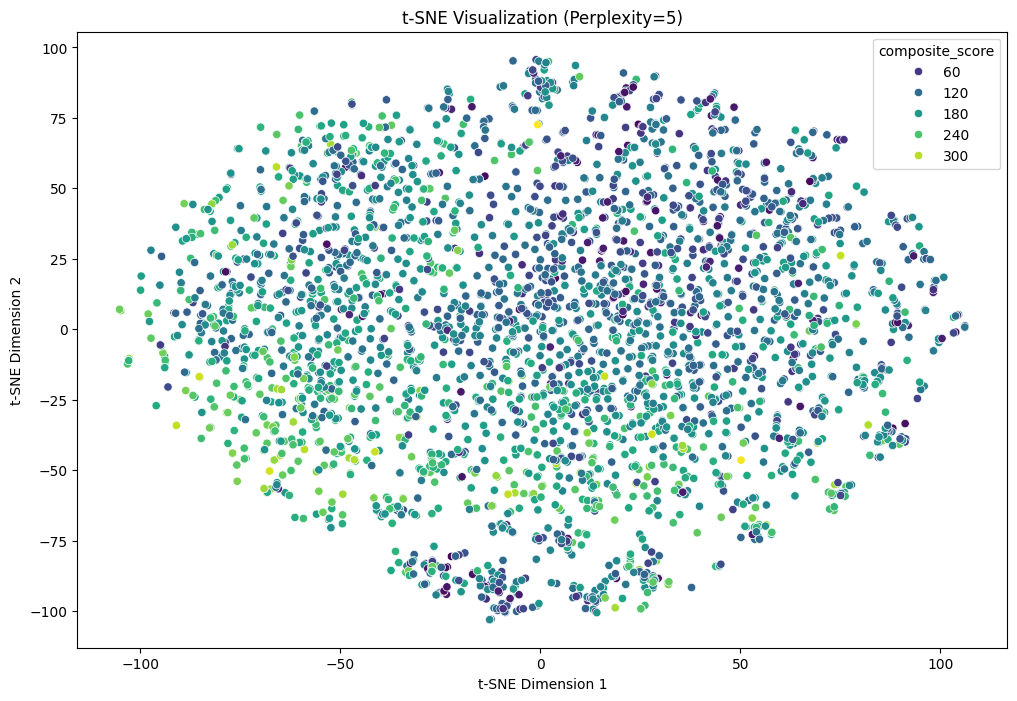

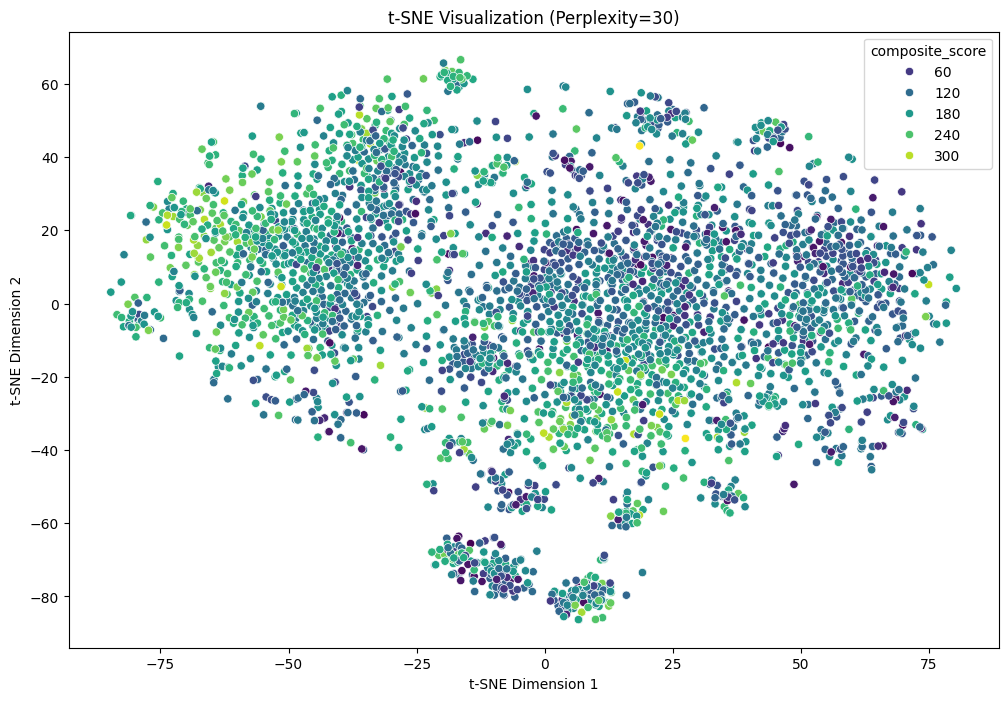

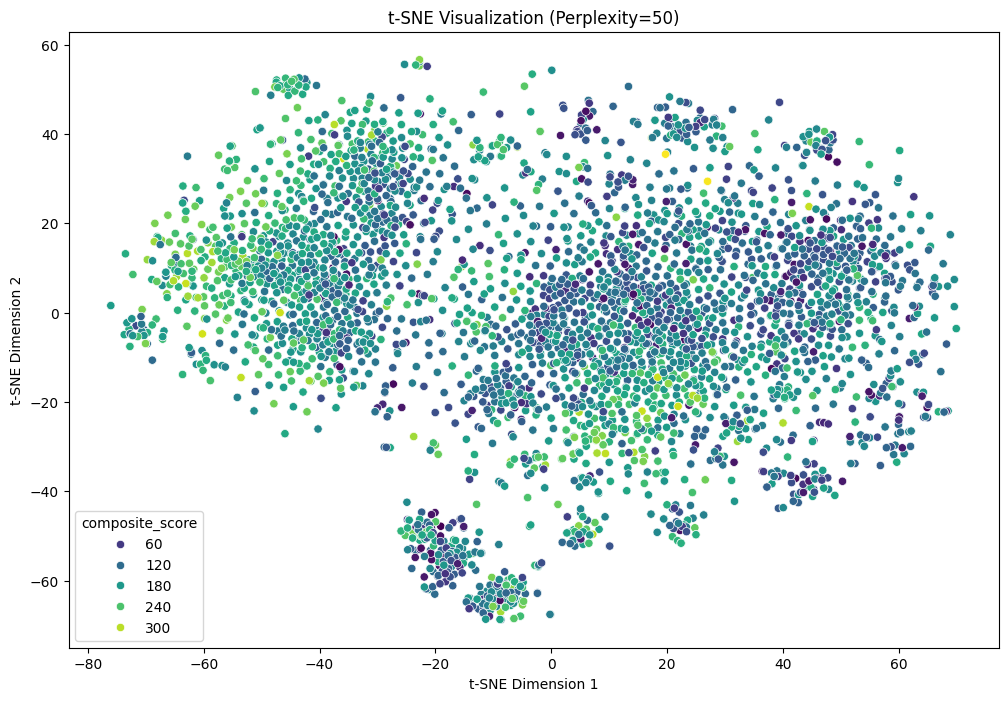

In [7]:
from sklearn.manifold import TSNE

# Try different perplexity values
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    tsne_results = tsne.fit_transform(scaled_features)
    data[f'TSNE_1_p{perplexity}'] = tsne_results[:, 0]
    data[f'TSNE_2_p{perplexity}'] = tsne_results[:, 1]
    
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=f'TSNE_1_p{perplexity}', y=f'TSNE_2_p{perplexity}',
        hue=target,
        palette='viridis',
        data=data,
        legend='brief'
    )
    plt.title(f't-SNE Visualization (Perplexity={perplexity})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()


## UMAP

/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


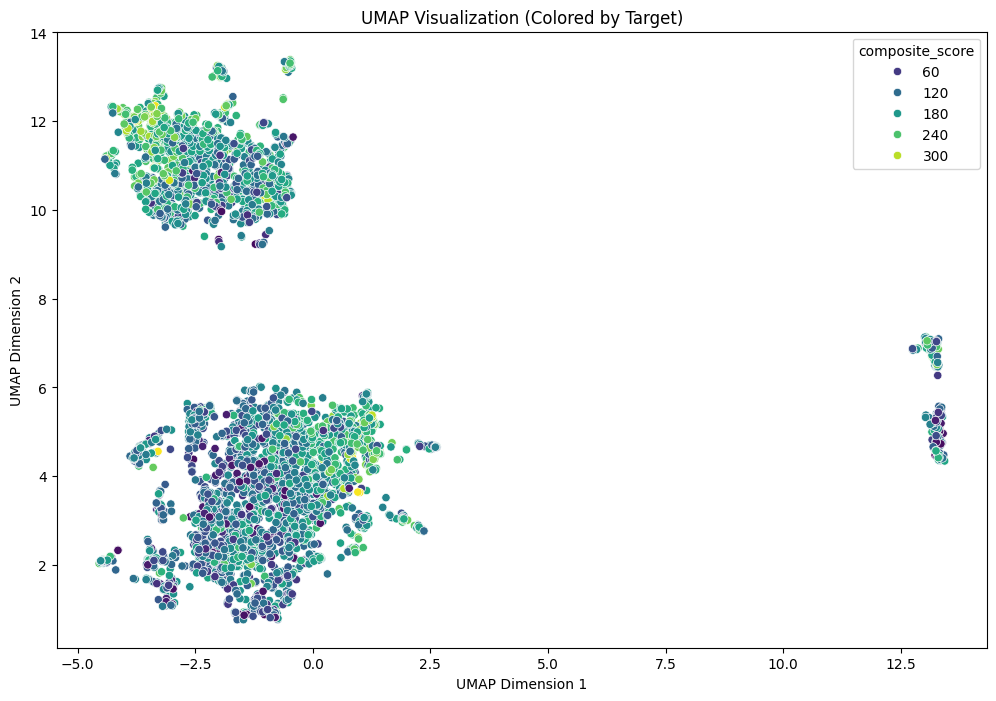

In [10]:
import umap.umap_ as umap

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer.fit_transform(scaled_features)

# Add UMAP results to the DataFrame
data['UMAP_1'] = umap_results[:, 0]
data['UMAP_2'] = umap_results[:, 1]

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue=target,
    palette='viridis',
    data=data,
    legend='brief'
)
plt.title('UMAP Visualization (Colored by Target)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()
